Epoch [10/100], Loss: 590.0646377563477
Epoch [20/100], Loss: 631.114010810852
Epoch [30/100], Loss: 624.3794424533844
Epoch [40/100], Loss: 627.2180084228515
Epoch [50/100], Loss: 656.4096771240235
Epoch [60/100], Loss: 521.4634279251098
Epoch [70/100], Loss: 663.8804974555969
Epoch [80/100], Loss: 611.55316696167
Epoch [90/100], Loss: 570.7471069335937
Epoch [100/100], Loss: 631.5685211181641


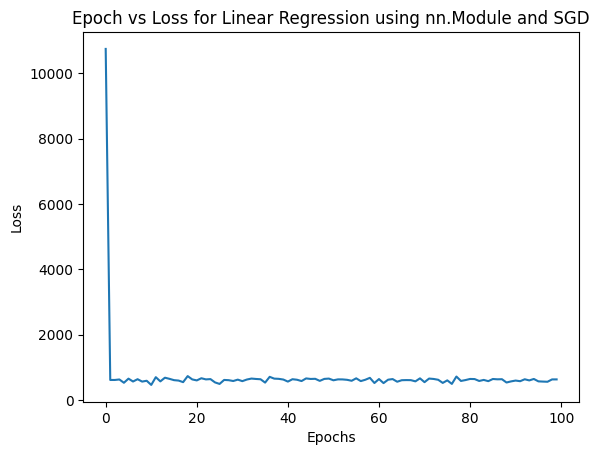

Final w: 12.513358116149902
Final b: 3.768031120300293


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader


class LinearRegressionDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]


class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        
        self.w = nn.Parameter(torch.tensor(1.0)) 
        self.b = nn.Parameter(torch.tensor(1.0))
    
    def forward(self, x):
        return self.w * x + self.b


x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0]).view(-1, 1)
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0]).view(-1, 1)


dataset = LinearRegressionDataset(x, y)


dataloader = DataLoader(dataset, batch_size=1, shuffle=True)


model = RegressionModel()


optimizer = optim.SGD(model.parameters(), lr=0.001)


criterion = nn.MSELoss()


epochs = 100


losses = []


for epoch in range(epochs):
    epoch_loss = 0.0
    
    
    for batch_x, batch_y in dataloader:
        
        optimizer.zero_grad()
        
        
        y_pred = model(batch_x)
        
       
        loss = criterion(y_pred, batch_y)
        
      
        loss.backward()
        
        
        optimizer.step()
        
        
        epoch_loss += loss.item()

    
    losses.append(epoch_loss / len(dataloader))

    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(dataloader)}")


plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Loss for Linear Regression using nn.Module and SGD')
plt.show()


print(f"Final w: {model.w.item()}")
print(f"Final b: {model.b.item()}")
